Task: Multi-Line Plot with Interactive Annotations
Visualize the performance of three products (A, B, and C) over 12 months using a multi-line plot. Add interactive annotations to display the specific values when hovering over data points.

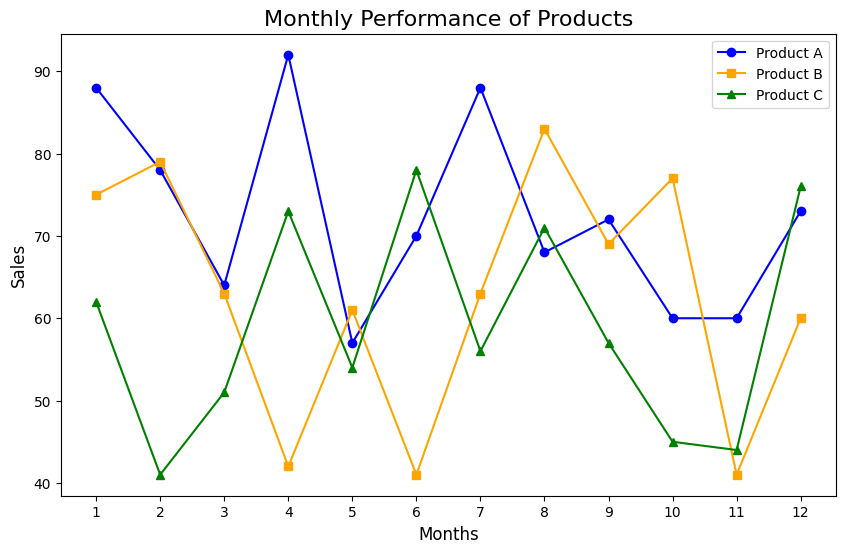

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data for 3 products over 12 months
np.random.seed(42)
months = np.arange(1, 13)
product_a = np.random.randint(50, 100, size=12)
product_b = np.random.randint(40, 90, size=12)
product_c = np.random.randint(30, 80, size=12)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the lines
line_a, = ax.plot(months, product_a, label="Product A", marker="o", color="blue")
line_b, = ax.plot(months, product_b, label="Product B", marker="s", color="orange")
line_c, = ax.plot(months, product_c, label="Product C", marker="^", color="green")

# Add labels, title, and legend
ax.set_title("Monthly Performance of Products", fontsize=16)
ax.set_xlabel("Months", fontsize=12)
ax.set_ylabel("Sales", fontsize=12)
ax.set_xticks(months)
ax.legend()

# Create annotation
annot = ax.annotate("", xy=(0, 0), xytext=(15, 15), textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

# Function to update annotation
def update_annot(line, ind):
    x, y = line.get_data()
    annot.xy = (x[ind["ind"][0]], y[ind["ind"][0]])
    text = f"Month: {int(x[ind['ind'][0]])}\nSales: {y[ind['ind'][0]]}"
    annot.set_text(text)
    annot.get_bbox_patch().set_facecolor(line.get_color())
    annot.get_bbox_patch().set_alpha(0.6)

# Event handler for hovering
def on_hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        for line in [line_a, line_b, line_c]:
            cont, ind = line.contains(event)
            if cont:
                update_annot(line, ind)
                annot.set_visible(True)
                fig.canvas.draw_idle()
                return
    if vis:
        annot.set_visible(False)
        fig.canvas.draw_idle()

# Connect the event to the figure
fig.canvas.mpl_connect("motion_notify_event", on_hover)

# Show plot
plt.show()
